## (a)  Focus on inner products, vector operations, distance metrics and their relation to ML (evaluation and other metrics). You may relate this to week 10 (evaluation) but focus on vectors.
Vectors
- Key point: “Vectors and distances allow us to compare data points quantitatively in machine learning.”
    - Dot product: $v \cdot w = (v_1 * w_1) + (v_2 * w_2)$
        - (Ortho-parallel)
        - Length of vectors

    - Len Vec: $||v||=\sqrt{a^2+b^2}$ $|x|=\sqrt{x^{T}x}$
        - Angle between 2 vectors
    - Linearly dependent
        - When a vector is a linear combination of another vector then they are linearly dependent and is the same as just scaling one of the vectors.
- We use vectors to represent poses
    - Each pose is just a vector
- Euclidean distance as similarity measure - vector subtraction between poses
    - Find level of difference between poses with length of difference vector (p1-p2)
    - We could use angle to find this but this doesn’t account for scale so the poses could differ in that aspect thus we usually use length of a vec instead
- Norm of a vector difference
- Relation to ML
    - Distance-based similarity (W2 - task 3)
    - Distance matrix - Shows the distance between all pairs of vectors (W2 - task 3)
    - Error as vector distance (Gen pose to GT pose vibe)
    - Evaluation metrics week 10 (TODO MAYBE DO)


# Evaluating poses

**Overview**
In this exercise you will compare high-dimensional vectors of human poses (from a dataset of badminton poses) using distance between poses. The dataset contains 18 sample poses, each defined by 25 points $(x_i, y_i)$. Your task is to calculate the Euclidean distance ($L_2$-norm) between all poses.


<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#load">Task 1: Load and inspect the data</a>
            </li>
            <li>
            <a href="#inspect">Task 2: Visually inspect and compare poses</a>
            </li>
            <li>
            <a href="#dist">Task 3: Calculate pose distance</a>
            </li>
            <li>
            <a href="#comparison">Task 4: Most similar pose pairs</a>
            </li>
            <li>
            <a href="#comparison2">Task 5: Compare poses</a>
            </li>
        </ul>
    </div>
</article>

The dataset is loaded and stored in an $18\times 50$-dimensional Numpy array. Each row in `poses`
 has the form $x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}$, i.e. it is a list of $50$ elements constituting $25$ points.

---
**Task 1 (easy): Load and inspect the data💡**
1. Run the cell below to load the data.
2. Print the first pose in the dataset (index 0).

**Note:** Note that the output above is still a 1D array, it is simply printed over multiple lines


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import util_poses

poses = np.load("data/poses.npy")

In [2]:
# Get the first pose and print it
# Write your solution here

print(poses[0])

[-27.99571178  -6.48683038  -0.11660905  -1.17064333   0.84333174
  -1.17055863   1.40324612  -0.75536782   1.64424262  -0.39685233
  -0.91658014  -1.19784466  -1.47706657  -0.75565014  -1.63809865
  -0.67290277  -0.0346016   -0.2573026    0.52441385  -0.28487094
   0.92472628   0.2406497    1.08637127   0.87586495  -0.35960773
  -0.2296778   -0.75350502   0.46266449  -0.75767282   1.26336037
 -27.99571178  -6.48683038 -27.99571178  -6.48683038   0.4412623
  -1.52924351  -0.43720223  -1.53048571  -1.23831741   1.26319098
  -1.39460965   1.34502082  -0.67480729   1.34740641   0.68458786
   1.12472817   1.08424651   1.09708925   1.16224962   0.93142511]


The cell below visualises each pose in the dataset:


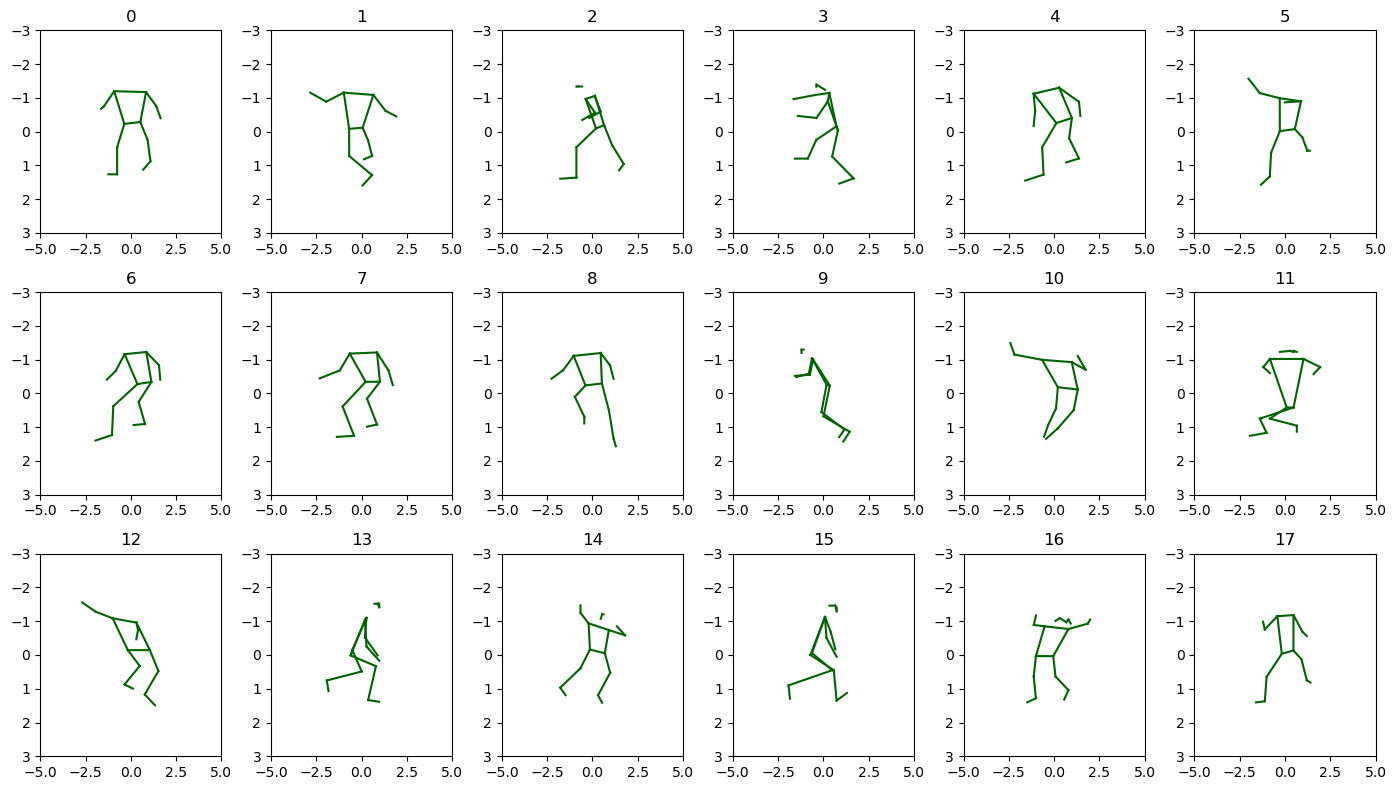

In [3]:
# Create a 6x3 grid of subplots
fig, ax = plt.subplots(3, 6, figsize=(14, 8))

for i, p in enumerate(poses):
    axis = ax[i//6, i%6] # Select the appropriate subplot
    util_poses.plot_single_pose(p, axis)

    axis.set_title(i)
    axis.set_xlim(-5, 5)
    axis.set_ylim(3,-3)


plt.tight_layout()


---
**Task 2 (easy): Visually inspect and compare poses💡**
This task involves visual inspection of the poses.
1. Choose the three pairs of poses that look most similar and note their indices.
2. Choose the three pairs of poses that look least similar and note their indices.


---

In [0]:
# Note the indices of the poses here.

# MoST Simailiar
# 6 - 7 (honorable mention goes out to my guy 4 for his griddy moves)
# 0 - 8
# 13 - 15

# Leasatsat similiar 
# 9 - 16
# 11 - 3
# 5 - 13 


---
**Task 3 (easy): Calculate pose distance👩‍💻📽️**
In this task you will calculate the Euclidean distance ($L_2$ norm) between all the poses.
**Note:** Note that the distance is symmetric, such that the distance between pairs (a, b) and (b, a) are the same.

1. In the cell below, calculate the Euclidean distance between each combination of poses and store the result in an $18\times 18$ matrix called `res`
 (the name is important as the variable is used below) such that the distance between `poses[i]`
 and `poses[j]`
 is in position $i, j$ in the matrix.


---

In [8]:
# Write your solution here
res = np.zeros((18,18))

for i,p1 in enumerate(poses):
    for j,p2 in enumerate(poses):
        res[i][j] = np.sqrt(np.dot(p1-p2,p1-p2)) 


The following cell creates an 18x18 distance matrix: 


<Axes: >

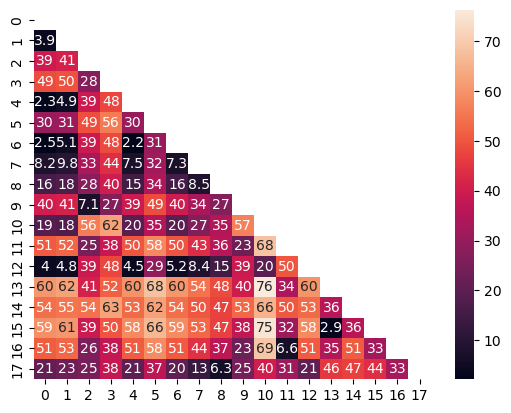

In [5]:
import seaborn as sns
t = np.triu(np.ones_like(res))
sns.heatmap(res, annot=True, mask=t)


---
**Task 4 (medium): Most similar pose pairs👩‍💻**
The **mandatory** part of the exercise has to be entered in [Grasple](https://app.grasple.com/#/courses/10532/ci/733917/diagnoses/12885)
 and requires you to complete question 1.
1. Determine the three most similar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them using the plotting function `plot_pair`
 from the file `util_poses.py`
. The function input is two full pose rows, hence input as e.g `poses[x], poses[y]`
 where `x`
 and `y`
 are indices.
2. Determine the three most dissimilar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them.


---

(6, 4, np.float64(2.2114718226569177))
(4, 0, np.float64(2.297434201974493))
(6, 0, np.float64(2.5004651789651153))
BREWAK
(13, 10, np.float64(76.25053410711986))
(15, 10, np.float64(74.94811034476399))
(16, 10, np.float64(68.82671465253037))


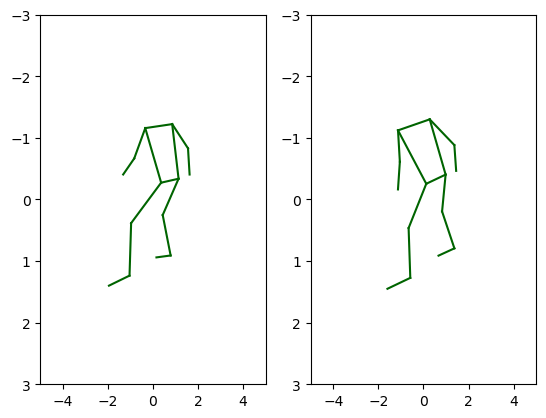

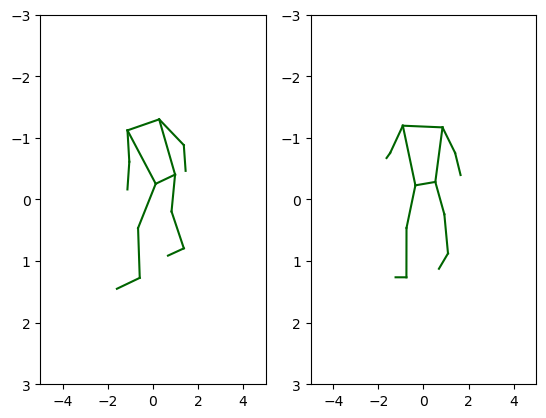

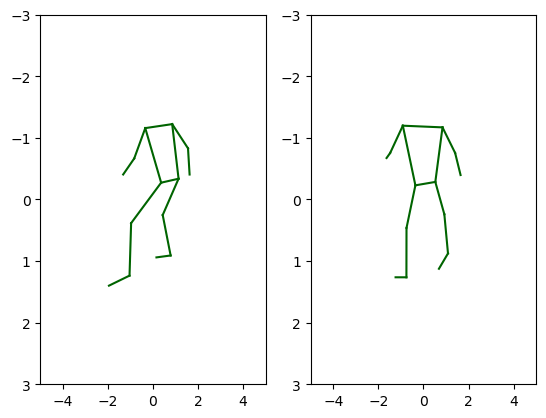

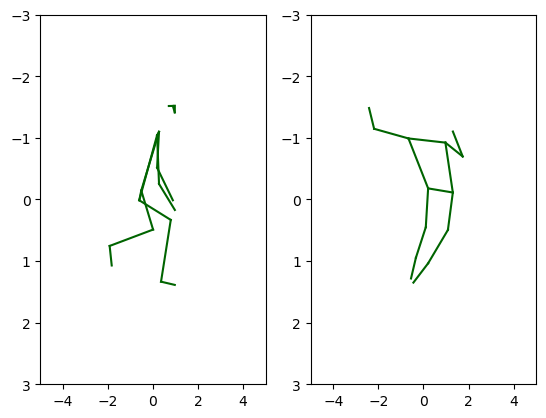

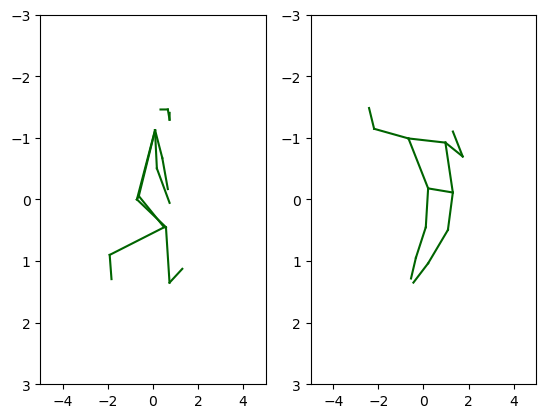

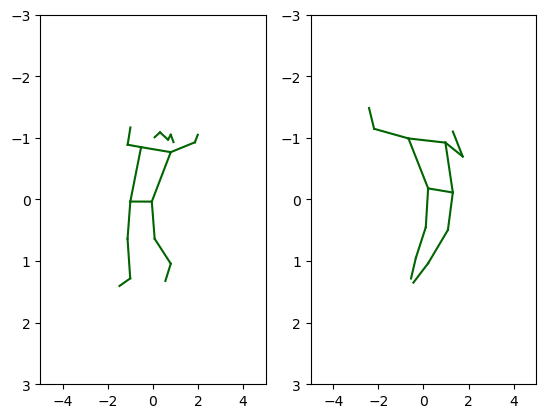

In [13]:
# Write your solution here

# index1 index2 result
min1 = (np.inf, np.inf, np.inf)
min2 = (np.inf, np.inf, np.inf)
min3 = (np.inf, np.inf, np.inf)

max1 = (-np.inf, -np.inf, -np.inf)
max2 = (-np.inf, -np.inf, -np.inf)
max3 = (-np.inf, -np.inf, -np.inf)

for i in range(len(res)):
    for j in range(i):
        if res[i][j] < min1[2]:
            min3 = min2
            min2 = min1
            min1 = (i,j,res[i][j])
        elif res[i][j] < min2[2]:
            min3 = min2
            min2 = (i,j,res[i][j])
        elif res[i][j] < min3[2]:
            min1 = (i,j,res[i][j])
        if res[i][j] > max1[2]:
            max3 = max2
            max2 = max1
            max1 = (i,j,res[i][j])
        elif res[i][j] > max2[2]:
            max3 = max2
            max2 = (i,j,res[i][j])
        elif res[i][j] > max3[2]:
            max3 = (i,j,res[i][j])


util_poses.plot_pair(poses[min1[0]],poses[min1[1]])
print(min1)
util_poses.plot_pair(poses[min2[0]],poses[min2[1]])
print(min2)
util_poses.plot_pair(poses[min3[0]],poses[min3[1]])
print(min3)

print("BREWAK")

util_poses.plot_pair(poses[max1[0]],poses[max1[1]])
print(max1)
util_poses.plot_pair(poses[max2[0]],poses[max2[1]])
print(max2)
util_poses.plot_pair(poses[max3[0]],poses[max3[1]])
print(max3)


---
**Task 5 (medium): Compare poses💡📽️**
1. Compare the pose-pairs you chose in [Task 2](#inspect) with the calculated pose-pairs. How well did your intuition match the calculated result?


---

In [0]:
# write your reflections here
# We got the first one correct if you count mr griddy the honorable mention
# Else we got nothing

# We got non of these we suck lol